Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Data loading and Creating the Dataframe

In [2]:
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Columns and datatypes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Identifying the null values and Droping the rows with missing null values 

In [4]:
print(data.isnull().sum())
data.drop_duplicates(inplace=True)
data.dropna(subset=['director','country'], inplace=True)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


Converting date_added column to datetime

In [5]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [6]:
 print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


Count of the number of Movies and TV Shows

In [8]:
# Count of the number of Movies and TV Shows
type_counts = data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


Distribution of Content by Type

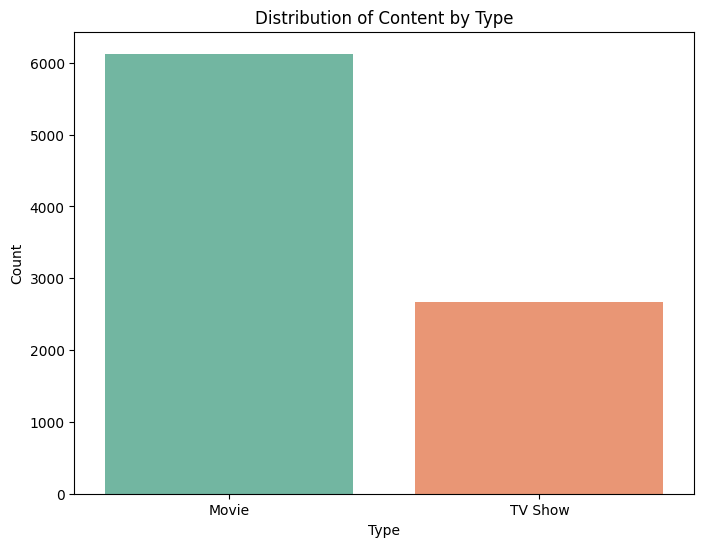

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2',legend=False)
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [10]:
# Spliting the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

Most Common Genres on Netflix

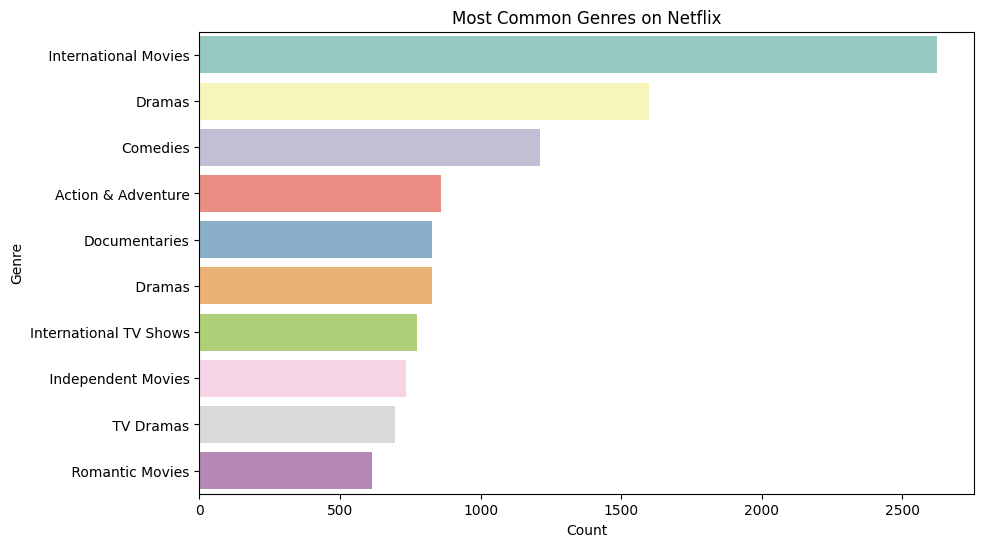

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='Set3', legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [29]:
# Extract year and month from 'date_added'
y=genre_counts.index,
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

Content Added Over Time

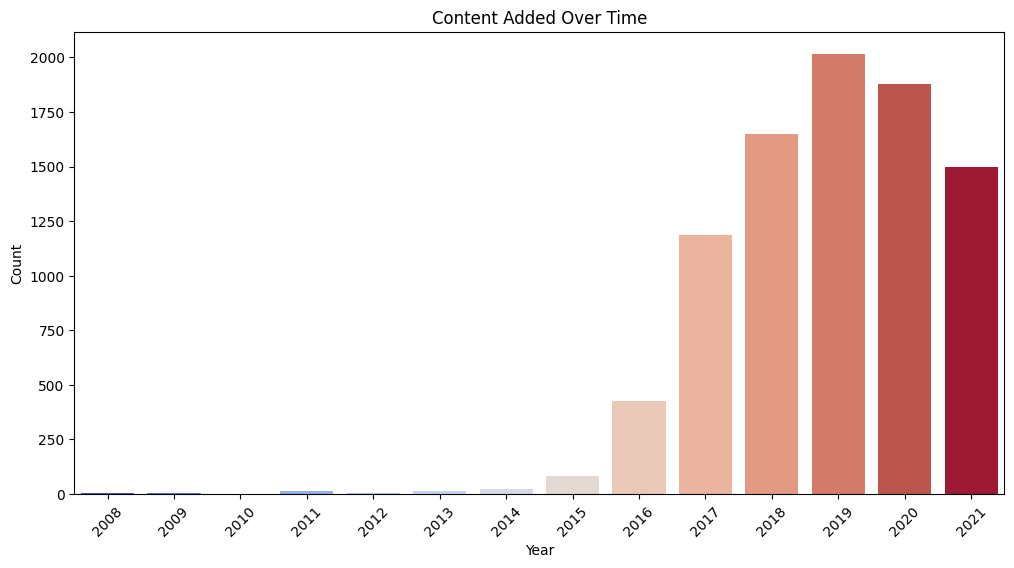

In [31]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm', hue='year_added', legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
print(top_directors)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64


Top 10 Directors with the Most Titles

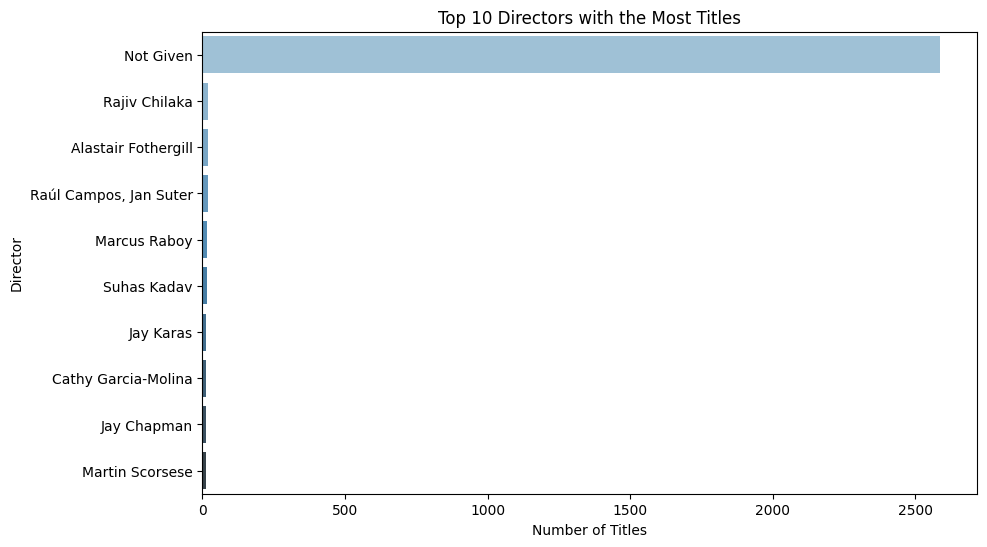

In [32]:
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d', hue=top_directors.index, legend=False)
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

Word Cloud of Movie Titles

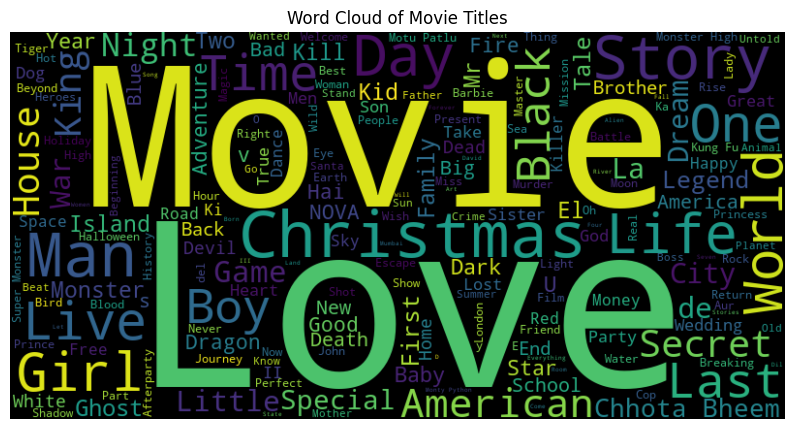

In [18]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud=WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))
#Plot word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

Summary

In [21]:
print("Summary Statistics:")
data.describe()

Summary Statistics:


,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


Saving the Cleaned dataset for Tableau Visualization

In [22]:
data.to_csv("cleaned_netflix1.csv", index=False)
print("Cleaned data saved to 'cleaned_netflix1.csv'.")

Cleaned data saved to 'cleaned_netflix1.csv'.
